In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng=np.random.RandomState(42)
noise= rng.normal(size=(len(cancer.data),50))


In [4]:
X_w_noise= np.hstack([cancer.data,noise])
X_train,X_test,y_train,y_test = train_test_split(X_w_noise,cancer.target,random_state=0,test_size=0.5)

In [6]:
select= SelectPercentile(percentile=50)
select.fit(X_train,y_train)
X_train_selected=select.transform(X_train)

In [7]:
print(X_train.shape,X_train_selected.shape)

(284, 80) (284, 40)


In [9]:
print(select.get_support())

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


In [10]:
import matplotlib.pyplot as plt

In [11]:
plt.matshow(select.get_support().reshape(-1,1),cmap='gray_r')

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
X_test_selected=select.transform(X_test)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
print(format(logreg.score(X_test,y_test)))

0.9298245614035088


In [26]:
logreg.fit(X_train_selected,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
print(format(logreg.score(X_test_selected,y_test)))

0.9403508771929825


In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select=SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42), threshold='median')

In [29]:
select.fit(X_train,y_train)
X_train_s= select.transform(X_train)

In [30]:
print(X_train_s.shape)

(284, 40)


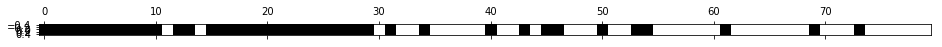

In [31]:
mask=select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.show()

In [35]:
X_test_s =select.transform(X_test)
score=LogisticRegression().fit(X_train_s,y_train).score(X_test_s,y_test)
print(score)

0.950877192982
